In [21]:
import pandas as pd

from pathlib import Path

import os, sys
sys.path.append(os.path.abspath('..'))

from python_scripts.activity_analysis import compute_all_events
from python_scripts.metric_computation import compute_segment_metrics


## Load Data

In [22]:
df = pd.read_csv("../data/capture_clean.csv", parse_dates=["t"])

## Computing metrics for events
* This comes after step events detection.
* Calculate metrics for each event which includes start time and end time, contact duration, pressure loads and temperatures.

In [23]:
P_SENSORS = [
    "p_BigToe",
    "p_1st-metatarsal",
    "p_3rd-metatarsal",
    "p_5th-metatarsal(side)"
]

T_SENSORS = [
    "t_BigToe",
    "t_1st-metatarsal",
    "t_3rd-metatarsal",
    "t_5th-metatarsal(side)"
]

events_df = compute_all_events(
    df,
    sensors=P_SENSORS,
    temp_cols=T_SENSORS
)


In [24]:
out = Path('../data/metrics')
out.mkdir(parents=True, exist_ok=True)
events_df.to_csv(out / 'events.csv', index=False)
events_df.head()

,patient_id,segment_id,event_id,start_time,end_time,contact_time_sec,mean_load,peak_load,load_var,pti,temp_mean,temp_max,temp_min,temp_std
0,7,0,0,2023-09-03 10:25:55.653,2023-09-03 10:25:58.813,3.160,0.431314,0.519670,0.002479,1.171126,27.888889,29,26,0.887300
1,7,0,1,2023-09-03 10:25:59.898,2023-09-03 10:26:00.555,0.657,0.420383,0.474292,0.002906,0.110309,28.125000,29,27,0.834523
2,7,0,2,2023-09-03 10:26:01.322,2023-09-03 10:26:04.114,2.792,0.464998,0.686388,0.009050,1.051376,28.375000,30,27,0.906962
3,10,0,0,2023-09-05 18:06:25.988,2023-09-05 18:06:26.417,0.429,0.365718,0.365718,0.000000,0.000000,27.250000,28,27,0.500000
4,10,0,1,2023-09-05 18:06:28.110,2023-09-05 18:06:28.824,0.714,0.396858,0.454997,0.003380,0.118551,27.375000,28,27,0.517549


## Visualisations

In [25]:
import matplotlib.pyplot as plt

pid = 426
ev = events_df[events_df["patient_id"] == pid].copy()

print(f"Number of events for patient {pid}: {len(ev)}")
ev.head()


Number of events for patient 426: 22


,patient_id,segment_id,event_id,start_time,end_time,contact_time_sec,mean_load,peak_load,load_var,pti,temp_mean,temp_max,temp_min,temp_std
1053,426,0,0,2024-07-25 08:10:19.414,2024-07-25 08:10:19.830,0.416,0.097938,0.097938,0.000000,0.000000,26.0,33,6,13.341664
1054,426,1,0,2024-07-25 08:10:46.670,2024-07-25 08:10:46.963,0.293,0.612388,0.612388,0.000000,0.000000,26.0,33,6,13.341664
1055,426,1,1,2024-07-25 08:10:47.417,2024-07-25 08:10:47.997,0.580,0.620621,0.621943,0.000002,0.174144,26.0,33,6,12.351981
1056,426,1,2,2024-07-25 08:10:48.392,2024-07-25 08:10:48.753,0.361,0.692449,0.692449,0.000000,0.000000,26.0,33,6,13.341664
1057,426,1,3,2024-07-25 08:10:49.651,2024-07-25 08:10:50.107,0.456,0.659080,0.896915,0.056565,0.019377,26.0,33,6,12.351981


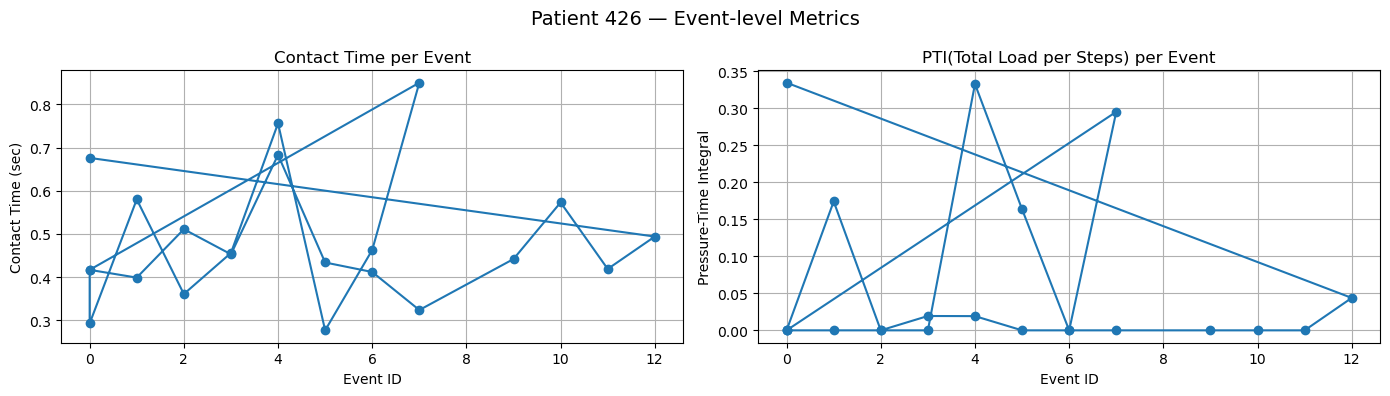

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

# Contact time
axes[0].plot(ev["event_id"], ev["contact_time_sec"], marker="o")
axes[0].set_title("Contact Time per Event")
axes[0].set_xlabel("Event ID")
axes[0].set_ylabel("Contact Time (sec)")
axes[0].grid(True)

# PTI
axes[1].plot(ev["event_id"], ev["pti"], marker="o")
axes[1].set_title("PTI(Total Load per Steps) per Event")
axes[1].set_xlabel("Event ID")
axes[1].set_ylabel("Pressure-Time Integral")
axes[1].grid(True)

plt.suptitle(f"Patient {pid} — Event-level Metrics", fontsize=14)
plt.tight_layout()


Path("../figures").mkdir(exist_ok=True)
out_path = f"../figures/id_{pid}_contact&totalload_metrics.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")


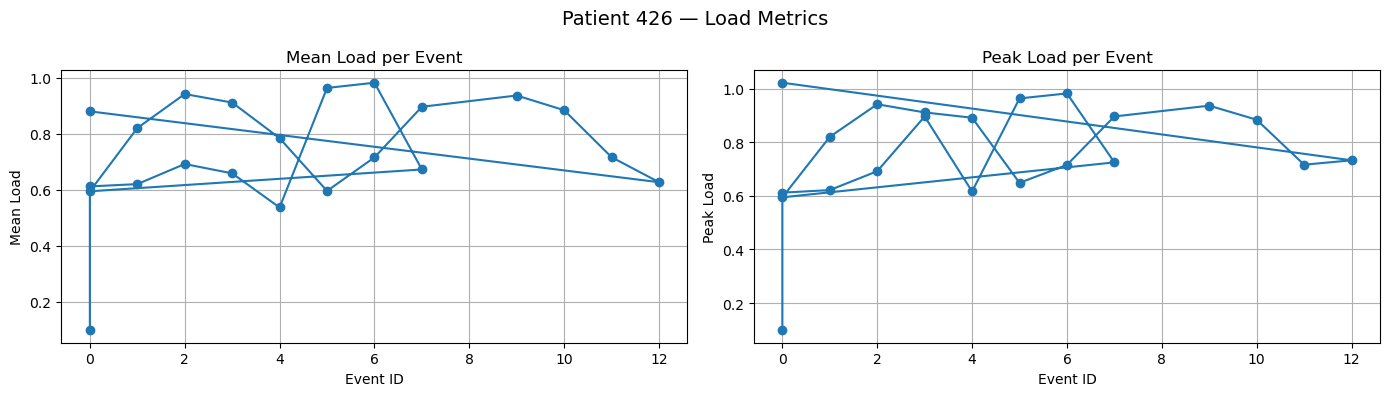

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True)

# Mean load
axes[0].plot(ev["event_id"], ev["mean_load"], marker="o")
axes[0].set_title("Mean Load per Event")
axes[0].set_xlabel("Event ID")
axes[0].set_ylabel("Mean Load")
axes[0].grid(True)

# Peak load
axes[1].plot(ev["event_id"], ev["peak_load"], marker="o")
axes[1].set_title("Peak Load per Event")
axes[1].set_xlabel("Event ID")
axes[1].set_ylabel("Peak Load")
axes[1].grid(True)

plt.suptitle(f"Patient {pid} — Load Metrics", fontsize=14)
plt.tight_layout()


out_path = f"../figures/id_{pid}_load_metrics.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")


## Computing metrics from each segments
* These metrics include cadence, rhythm, stance and pressure during a segment.

In [28]:
segment_df = compute_segment_metrics(events_df)

segment_df.to_csv(out / 'metrics.csv', index=False)
segment_df.head()

,patient_id,segment_id,steps,dur_sec,cadence_spm,mean_contact,contact_var,step_interval_mean,step_interval_cv,stance_pct,mean_pti,mean_load,peak_load,temp_mean,temp_max,temp_min
0,7,0,3,8.461,21.274081,2.203000,1.351460,2.8345,0.703739,116.581408,0.777603,0.438898,0.686388,28.129630,30,26
1,10,0,2,2.836,42.313117,0.571500,0.201525,2.1220,NaN,53.864279,0.059276,0.381288,0.454997,27.312500,28,27
2,11,0,3,3.564,50.505051,0.457667,0.173564,1.6120,0.198271,42.586849,0.009873,0.101755,0.102385,27.000000,28,26
3,13,0,1,3.201,18.744142,3.201000,NaN,NaN,NaN,NaN,0.961035,0.332905,0.426519,31.000000,32,30
4,14,0,1,2.480,24.193548,2.480000,NaN,NaN,NaN,NaN,0.796672,0.381448,0.473453,31.321429,32,30
